<a href="https://colab.research.google.com/github/ShashankMA02/PyTorch-start/blob/main/FK_Hexa1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [33]:
class FKModel(nn.Module):

  ## Input layer (6 motor values) --> Hidden layer1 (ex-12 neurons) --> Hidden layer2 (ex-18 neurons) --> Output layer (6 pos values)

  def __init__(self, in_features=6, h1=12, h2=18, out_features=6):

    super().__init__()  # instantiate our nn.module

    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)


  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [34]:
torch.manual_seed(42)
model = FKModel()
print(model)


FKModel(
  (fc1): Linear(in_features=6, out_features=12, bias=True)
  (fc2): Linear(in_features=12, out_features=18, bias=True)
  (out): Linear(in_features=18, out_features=6, bias=True)
)


In [35]:
motor_url = 'https://raw.githubusercontent.com/ShashankMA02/CSV_data_of_Hexa/main/XY_0_50_s1_mot.csv'
position_url = 'https://raw.githubusercontent.com/ShashankMA02/CSV_data_of_Hexa/main/XY_0_50_s1_pos.csv'

mot_df = pd.read_csv(motor_url)
pos_df = pd.read_csv(position_url)

# pos_df
# mot_df

In [36]:
# Train Test Split set X, y

X = mot_df  # Motors values as input
y = pos_df  # Position values as output , hence Forward Kinematics

# Convert these to numpy array
X = X.values
y = y.values

In [37]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# Convert y features to float tensors
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

# Criterion to measure error of prediction
criterion = nn.CrossEntropyLoss()

# Optimizer and learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [38]:
# Model training

epochs = 1000
losses = []

for i in range(epochs):

  # go forward and get a prediction
  y_pred = model.forward(X_train)      # get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train)    #predicted values vs the y_train

  # keep track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epochs
  if i%10 == 0:
    print(f'Epochs: {i} and loss: {loss}')


  # Do some back propogation: take the error rate of forward propogation and
  # feed it back through the network to fine tune the weights

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epochs: 0 and loss: 95803.3359375
Epochs: 10 and loss: 42611.23046875
Epochs: 20 and loss: 16738.5234375
Epochs: 30 and loss: 5887.55859375
Epochs: 40 and loss: 5386.265625
Epochs: 50 and loss: 4078.78466796875
Epochs: 60 and loss: 2534.8271484375
Epochs: 70 and loss: 1809.6278076171875
Epochs: 80 and loss: 1239.6236572265625
Epochs: 90 and loss: 631.947509765625
Epochs: 100 and loss: 375.15631103515625
Epochs: 110 and loss: 335.77142333984375
Epochs: 120 and loss: 331.00048828125
Epochs: 130 and loss: 318.19439697265625
Epochs: 140 and loss: 312.34027099609375
Epochs: 150 and loss: 306.2912292480469
Epochs: 160 and loss: 300.6988220214844
Epochs: 170 and loss: 295.3301086425781
Epochs: 180 and loss: 289.8837890625
Epochs: 190 and loss: 284.4617614746094
Epochs: 200 and loss: 279.08404541015625
Epochs: 210 and loss: 273.759521484375
Epochs: 220 and loss: 268.506103515625
Epochs: 230 and loss: 263.3441162109375
Epochs: 240 and loss: 258.2938537597656
Epochs: 250 and loss: 253.3748168945

Text(0.5, 0, 'Epochs')

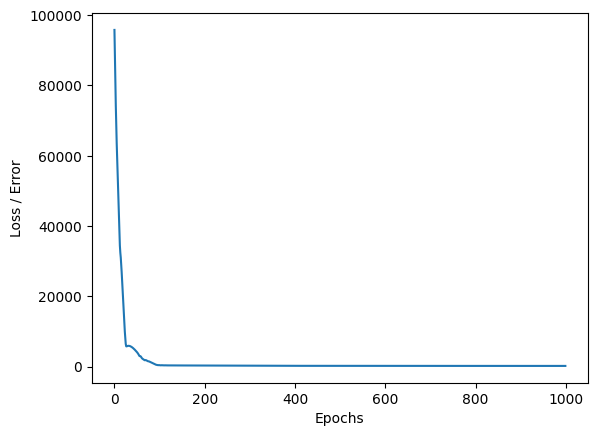

In [39]:
  # graph it out
plt.plot(range(epochs), losses)
plt.ylabel('Loss / Error')
plt.xlabel('Epochs')

In [40]:
# Evaluate Model on Test data set

with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

  print(f'Loss: {loss}')

Loss: 177.11215209960938


In [41]:
# New motor values for prediction
motors_new = [[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]]  # Replace with actual new motor values

# Normalize the new motor values
motors_new = scaler_motors.transform(motors_new)
motors_new = torch.tensor(motors_new, dtype=torch.float32)

# Make predictions
model.eval()
with torch.no_grad():
    positions_pred = model(motors_new)
    positions_pred = scaler_positions.inverse_transform(positions_pred.numpy())

print('Predicted positions:', positions_pred)


NameError: name 'scaler_motors' is not defined